# pytorch fundamentals

Can define tensors in torch and operate on them.

In [1]:
import torch

X = torch.Tensor([5,3])
Y = torch.Tensor([2,1])

print(X*Y)

tensor([10.,  3.])


In [2]:
Y = torch.rand([2,5])
print(Y)

tensor([[0.0384, 0.5201, 0.8723, 0.8118, 0.3066],
        [0.6937, 0.7547, 0.2891, 0.9737, 0.5963]])


Instead of a `reshape()` operation, in PyTorch there is a `view()` operation to reshape tensors.

In [3]:
print(Y.view([1,10]))

tensor([[0.0384, 0.5201, 0.8723, 0.8118, 0.3066, 0.6937, 0.7547, 0.2891, 0.9737,
         0.5963]])


### data cleaning and operations

In [14]:
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

In [10]:
trainset = DataLoader(train, batch_size=10, shuffle=True)
testset = DataLoader(test, batch_size=10, shuffle=True)

Get a glimpse of the data fetched and transformed.

In [11]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

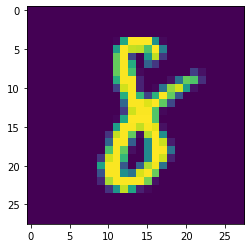

In [17]:
# reshape the image and print the data
plt.imshow(data[0][0].view(28,28))
plt.show()

### define a CNN for classifying images into numbers

Define the neural network 


In [19]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)        
        return F.softmax(x, dim=1)
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


Train the model

In [21]:
import torch.optim as optim

optimiser = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 5

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad() # make the delta in gradiants zero before computing the new delta in gradiants
        output = net(X.view(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimiser.step()
    print(loss)

tensor(-0.9000, grad_fn=<NllLossBackward>)
tensor(-0.9762, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)
tensor(-0.9000, grad_fn=<NllLossBackward>)
tensor(-1.0000, grad_fn=<NllLossBackward>)


Evaluate the correctness of the model

In [23]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy is ", round(correct/total, 3))

Accuracy is  0.949
